In [175]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [176]:

file=pd.read_excel("Merged files.xlsx",header=0)

In [177]:
file.head(3)

,Datum i vrijeme,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Brojilo el.energije ko 46621646El.energija VT (kWh),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
0,2015-10-01 00:00:00,3009985.0,371651.16,230421.12,1225692.6,1130192.8,NaN,NaN,NaN,67287.0,...,80.24,85344.0,0,3,10,2015,4,274,1,40
1,2015-10-01 01:00:00,3009985.0,371651.16,230427.44,1225692.6,1130224.6,NaN,NaN,NaN,67287.0,...,79.87,85344.0,1,3,10,2015,4,274,1,40
2,2015-10-01 02:00:00,3009985.0,371651.16,230433.52,1225692.6,1130256.4,NaN,NaN,NaN,67287.0,...,83.93,85344.0,2,3,10,2015,4,274,1,40


In [178]:
file['Datum i vrijeme'] = pd.to_datetime(file['Datum i vrijeme'],yearfirst=True)

In [179]:
#Merged files has been manually modified 
file["Sat"]=file["Datum i vrijeme"].dt.hour
file["Dan u sedmici"]=file["Datum i vrijeme"].dt.dayofweek
file["Mjesec"]=file["Datum i vrijeme"].dt.month
file["Godina"]=file["Datum i vrijeme"].dt.year
file['Kvartal'] =file['Datum i vrijeme'].dt.quarter
file['Dan u godini'] =file['Datum i vrijeme'].dt.dayofyear
file['Dan u mjesecu'] = file['Datum i vrijeme'].dt.day

In [180]:
file[:46].describe()

,Plinomjer ist.zgrada 00062313Plin (m3),Brojilo el.energije su 35649294El.energija VT (kWh),Brojilo el.energije su 35649294El.energija MT (kWh),Brojilo el.energije tr 35649314El.energija VT (kWh),Brojilo el.energije tr 35649314El.energija MT (kWh),Vodomjer stara 09249850Voda (m3),Vodomjer nova 09249847Voda (m3),Vodomjer hidrant 10058705Voda (m3),Brojilo el.energije ko 46621646El.energija VT (kWh),Brojilo el.energije ko 46621646El.energija MT (kWh),...,Temp.senzor vanj.1 25000099Vlažnost (%),Plinomjer zap.zgrada 20526377Plin (m3),Sat,Dan u sedmici,Mjesec,Godina,Kvartal,Dan u godini,Dan u mjesecu,Sedmica
count,46.0,46.000000,46.000000,4.600000e+01,4.600000e+01,0.0,0.0,0.0,46.0,4.600000e+01,...,46.000000,46.0,46.000000,46.000000,46.0,46.0,46.0,46.000000,46.000000,46.0
mean,3009985.0,371845.360000,230512.073913,1.226167e+06,1.130550e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,74.908478,85344.0,11.021739,3.478261,10.0,2015.0,4.0,274.478261,1.478261,40.0
std,0.0,136.646635,44.803285,3.521042e+02,1.660126e+02,NaN,NaN,NaN,0.0,4.413814e-11,...,10.269973,0.0,6.744509,0.505047,0.0,0.0,0.0,0.505047,0.505047,0.0
min,3009985.0,371651.160000,230421.120000,1.225693e+06,1.130193e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,56.430000,85344.0,0.000000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
25%,3009985.0,371713.380000,230493.350000,1.225808e+06,1.130478e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,64.970000,85344.0,5.250000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
50%,3009985.0,371878.180000,230496.700000,1.226259e+06,1.130478e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,75.790000,85344.0,11.000000,3.000000,10.0,2015.0,4.0,274.000000,1.000000,40.0
75%,3009985.0,371907.360000,230566.230000,1.226337e+06,1.130755e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,84.800000,85344.0,16.750000,4.000000,10.0,2015.0,4.0,275.000000,2.000000,40.0
max,3009985.0,372078.240000,230569.880000,1.226821e+06,1.130755e+06,NaN,NaN,NaN,67287.0,7.066290e+04,...,87.950000,85344.0,23.000000,4.000000,10.0,2015.0,4.0,275.000000,2.000000,40.0


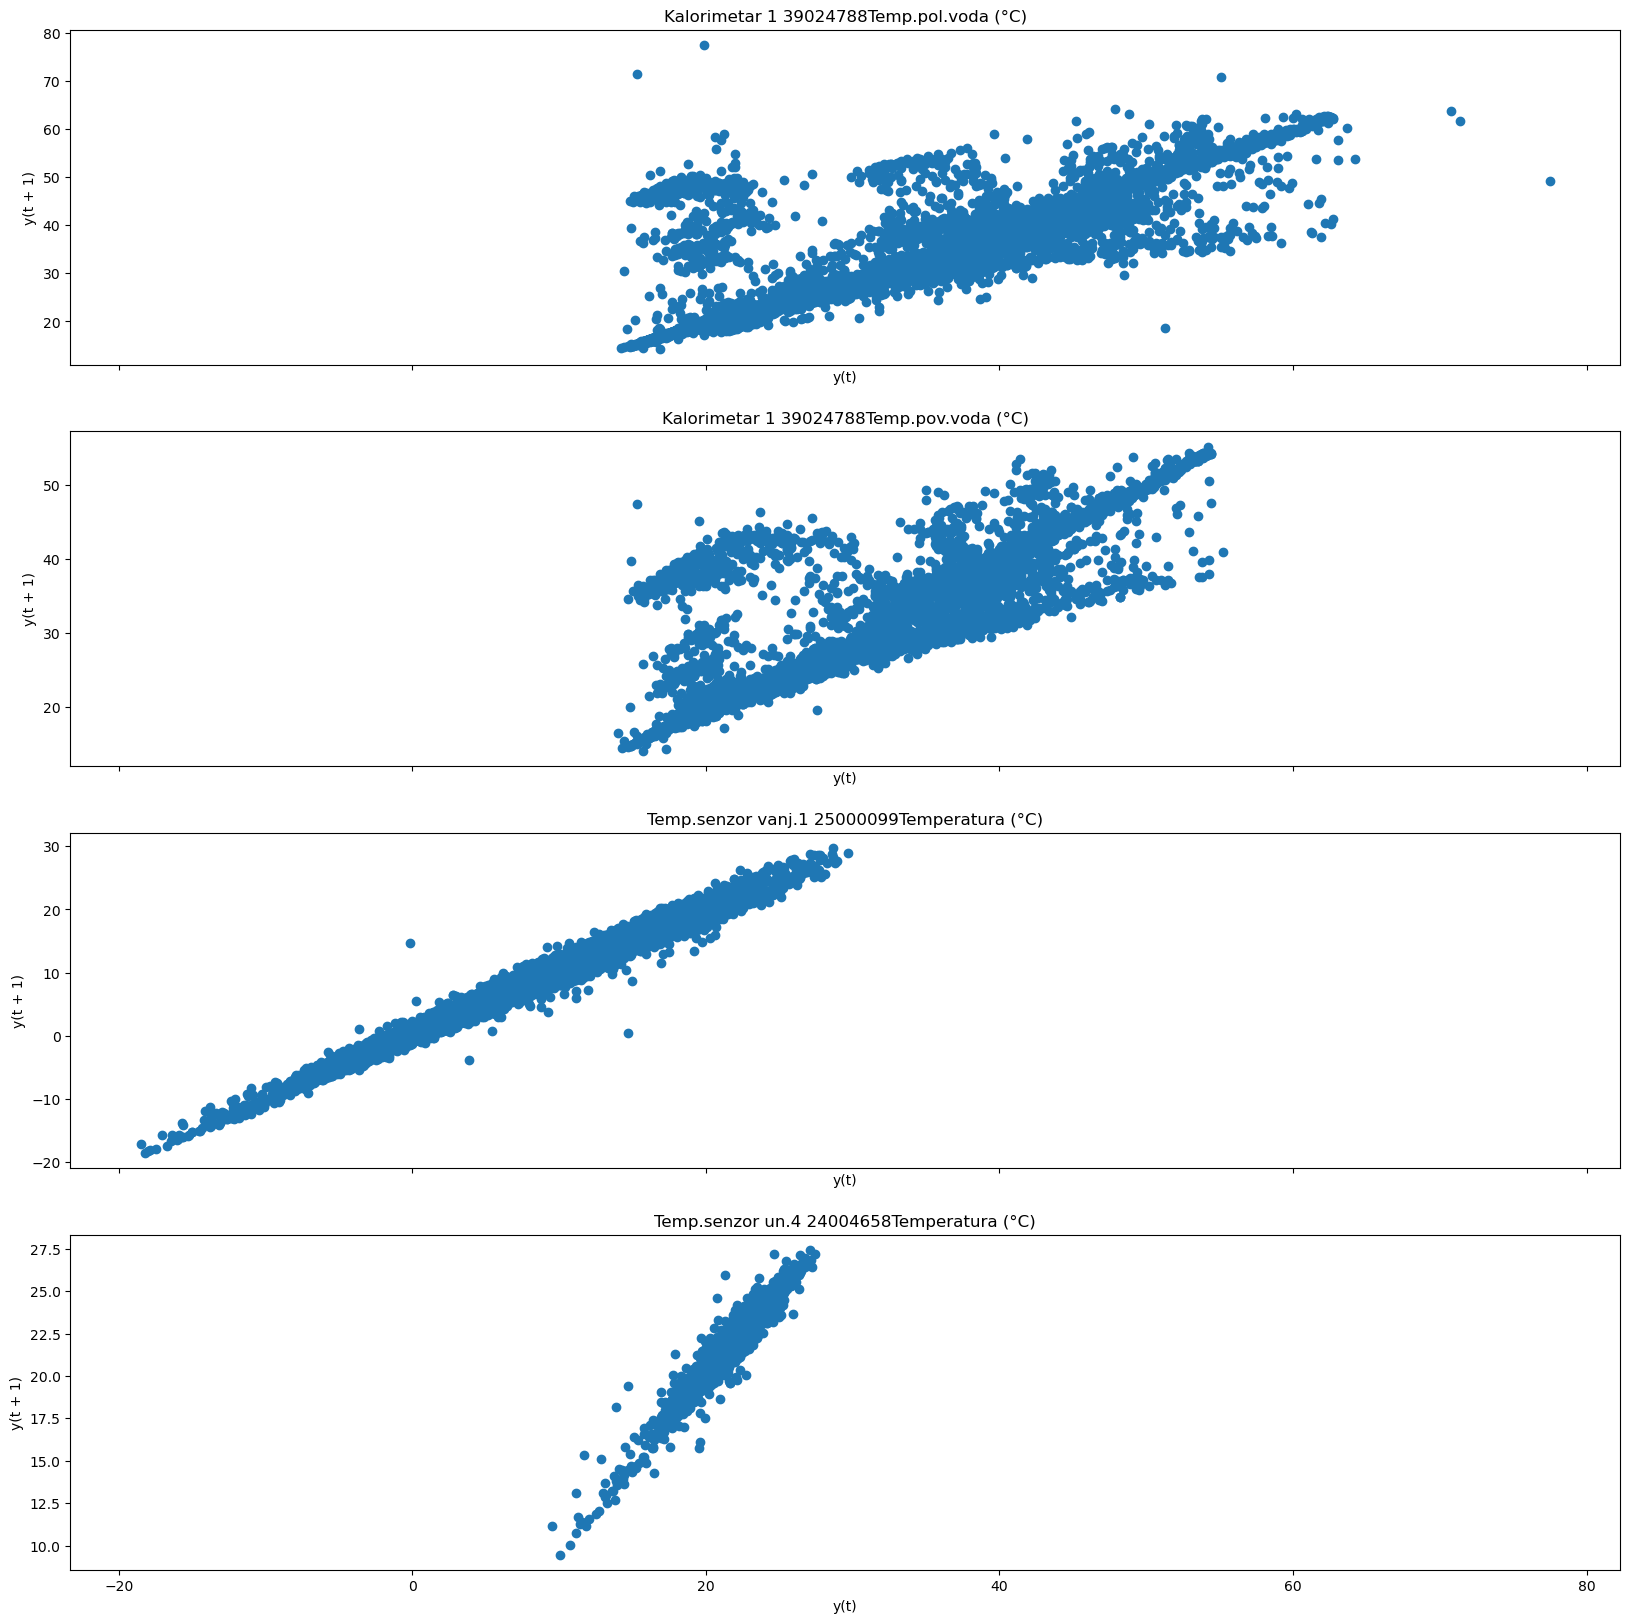

In [181]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(20,20))
series = ["Kalorimetar 1 39024788Temp.pol.voda (°C)","Kalorimetar 1 39024788Temp.pov.voda (°C)",'Temp.senzor vanj.1 25000099Temperatura (°C)','Temp.senzor un.4 24004658Temperatura (°C)']
for i,col in enumerate(series):
    
    lag_plot(file[col],ax=ax[i])
    ax[i].set_title(col)
pyplot.show()

In [182]:
file=file.drop(['Vodomjer hidrant 10058705Voda (m3)', 'Brojilo el.energije ko 46621646El.energija VT (kWh)', 'Brojilo el.energije ko 46621646El.energija MT (kWh)','Brojilo el.energije po 38878959El.energija VT (kWh)',
       'Brojilo el.energije po 38878959El.energija MT (kWh)',
       'Brojilo el.energije kl 46868995El.energija VT (kWh)',
       'Brojilo el.energije kl 46868995El.energija MT (kWh)', 'Kalorimetar 2 39024724Topl.energija (MWh)'],axis=1)

In [183]:
file.to_excel("Merged files_1.xlsx", index=False)

In [184]:
file=file.sort_values(by=["Godina","Dan u godini","Sat"])

In [185]:
file["Temp sr_K1"]=(file['Kalorimetar 1 39024788Temp.pol.voda (°C)']+file['Kalorimetar 1 39024788Temp.pov.voda (°C)'])/2
file["Temp sr_K3"]=(file['Kalorimetar 3 39024787Temp.pol.voda (°C)']+file['Kalorimetar 3 39024787Temp.pol.voda (°C)'])/2

In [186]:
def heat(val):
    if val>=40:
        return 1
    else: 
        return 0

In [187]:
file["Grijanje_K1"]=list(map(heat,file["Temp sr_K1"].values))
file["Grijanje_K3"]=list(map(heat,file["Temp sr_K3"].values))

In [188]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [189]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [190]:
file["Broj sati grijanja_K1"]=np.concatenate(values_tot)

In [191]:
values_tot=[]
for name,group in aa:

    values=[-1]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K3"].empty==False:
        b=np.argwhere(aa.get_group(name)["Grijanje_K3"].values==1)
        enum=list(enumerate(b))
        for k,val in enumerate(b):
            values[val[0]]=enum[k][0]  
    else:pass
    values_tot.append(values)

In [192]:
file["Broj sati grijanja_K3"]=np.concatenate(values_tot)

In [193]:
aa=file.groupby(["Godina","Dan u godini"], axis=0)

In [194]:
values_xbefore=[]
values_xafter=[]
for name,group in aa:
    values_before=[None]*len(aa.get_group(name))
    values_after=[None]*len(aa.get_group(name))
    if aa.get_group(name)["Grijanje_K1"].empty==False:
        
        b=np.argwhere(aa.get_group(name)["Grijanje_K1"].values)
        if b.size==0:
            values_before=values_before
            values_after=values_after
        else:
            values_before[b[0][0]]=b[0][0]
            values_after[b[-1][0]]=24-b[-1][0]
        
    values_xbefore.append(values_before)
    values_xafter.append(values_after)

In [195]:
val_xbefore=np.concatenate(values_xbefore)
val_xafter=np.concatenate(values_xafter)

In [196]:
file["Negrijano_K1_prije"]=np.concatenate(values_xbefore)
file["Negrijano_K1_poslije"]=np.concatenate(values_xafter)

In [197]:
bb=file.groupby(["Godina","Mjesec","Dan u mjesecu"], axis=0)

In [198]:
start_date_s1=file[file["Datum i vrijeme"]=='10/01/2015  00:00:00 AM'].index.values
end_date_s1=file[file["Datum i vrijeme"]=='05/09/2016  11:00:00 PM'].index.values
start_date_s2=file[file["Datum i vrijeme"]=='09/30/2016  00:00:00 AM'].index.values
end_date_s2=file[file["Datum i vrijeme"]=='04/25/2017  06:00:00 AM'].index.values
start_date_s3=file[file["Datum i vrijeme"]=='10/01/2017  00:00:00 AM'].index.values


In [199]:
S1=file.loc[start_date_s1[0]:end_date_s1[0]]
S2=file.loc[start_date_s2[0]:end_date_s2[0]]
S3=file.loc[start_date_s3[0]:]
print("Length of S1:", len(S1))
print("Length of S1:" ,len(S2))
print("Length of S1:" ,len(S3))

Length of S1: 5136
Length of S1: 4975
Length of S1: 5016


In [200]:
values_1=[None]*len(S1["Negrijano_K1_prije"].values)
values_1[0]=-2
num_before=np.argwhere(S1["Negrijano_K1_prije"].values)
num_after=np.argwhere(S1["Negrijano_K1_poslije"].values)
values_1[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_2=[None]*len(S2["Negrijano_K1_prije"].values)
values_2[0]=-2
num_before=np.argwhere(S2["Negrijano_K1_prije"].values)
num_after=np.argwhere(S2["Negrijano_K1_poslije"].values)
values_2[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

values_3=[None]*len(S3["Negrijano_K1_prije"].values)
values_3[0]=-2#pocetak sezone
num_before=np.argwhere(S3["Negrijano_K1_prije"].values)
num_after=np.argwhere(S3["Negrijano_K1_poslije"].values)
values_3[1:]=[num_before[val][0]-num_after[val-1][0] for val in range(1,len(num_before))]

In [201]:
val_unheat=np.concatenate([values_1,values_2,values_3])

In [202]:
file["Negrijano"]=np.empty(len(file["Negrijano_K1_prije"].values))
for val,k in list(enumerate(np.argwhere(file["Negrijano_K1_prije"].values))):
    file["Negrijano"].values[[k][0]]=val_unheat[val]

In [203]:
file[["Temp sr_K1","Temp sr_K3"]]=file[["Temp sr_K1","Temp sr_K3"]].fillna(0)


In [204]:
t1=S1['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)
t2=S2['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)
t3=S3['Temp.senzor un.4 24004658Temperatura (°C)'].shift(1)

t4=S1['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)
t5=S2['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)
t6=S3['Temp.senzor vanj.1 25000099Temperatura (°C)'].shift(1)

t7=S1['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)
t8=S2['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)
t9=S3['Kalorimetar 1 39024788Temp.pol.voda (°C)'].shift(1)

t10=S1['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)
t11=S2['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)
t12=S3['Kalorimetar 1 39024788Temp.pov.voda (°C)'].shift(1)

t_prior=np.concatenate([t1,t2,t3])
t_prior2=np.concatenate([t4,t5,t6])
t_prior3=np.concatenate([t7,t8,t9])
t_prior4=np.concatenate([t10,t11,t12])
file["T prost (t-1)"]=t_prior
file["T vanj(t-1)"]=t_prior2
file["T pol (t-1)"]=t_prior3
file["T pov (t-1)"]=t_prior4
file=file.dropna(subset=["T prost (t-1)"])



In [205]:
file[series].isna().sum()


Kalorimetar 1 39024788Temp.pol.voda (°C)       3
Kalorimetar 1 39024788Temp.pov.voda (°C)       3
Temp.senzor vanj.1 25000099Temperatura (°C)    2
Temp.senzor un.4 24004658Temperatura (°C)      3
dtype: int64

In [215]:
filex=file[["Datum i vrijeme"]+series].interpolate("bfill").copy()
# potrebno radi decompose

In [219]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in series:
    decomp = seasonal_decompose(filex[column], period=24, model='additive', extrapolate_trend='freq')
    filex[f"{column}_trend"] = decomp.trend
    filex[f"{column}_seasonal"] = decomp.seasonal

<ipython-input-222-446ae9f3e0e7>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(filex[column], freq=24, model='additive', extrapolate_trend='freq')
<ipython-input-222-446ae9f3e0e7>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(filex[column], freq=24, model='additive', extrapolate_trend='freq')
<ipython-input-222-446ae9f3e0e7>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(filex[column], freq=24, model='additive', extrapolate_trend='freq')
<ipython-input-222-446ae9f3e0e7>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(filex[column], freq=24, model='additive', extrapolate_trend='freq')


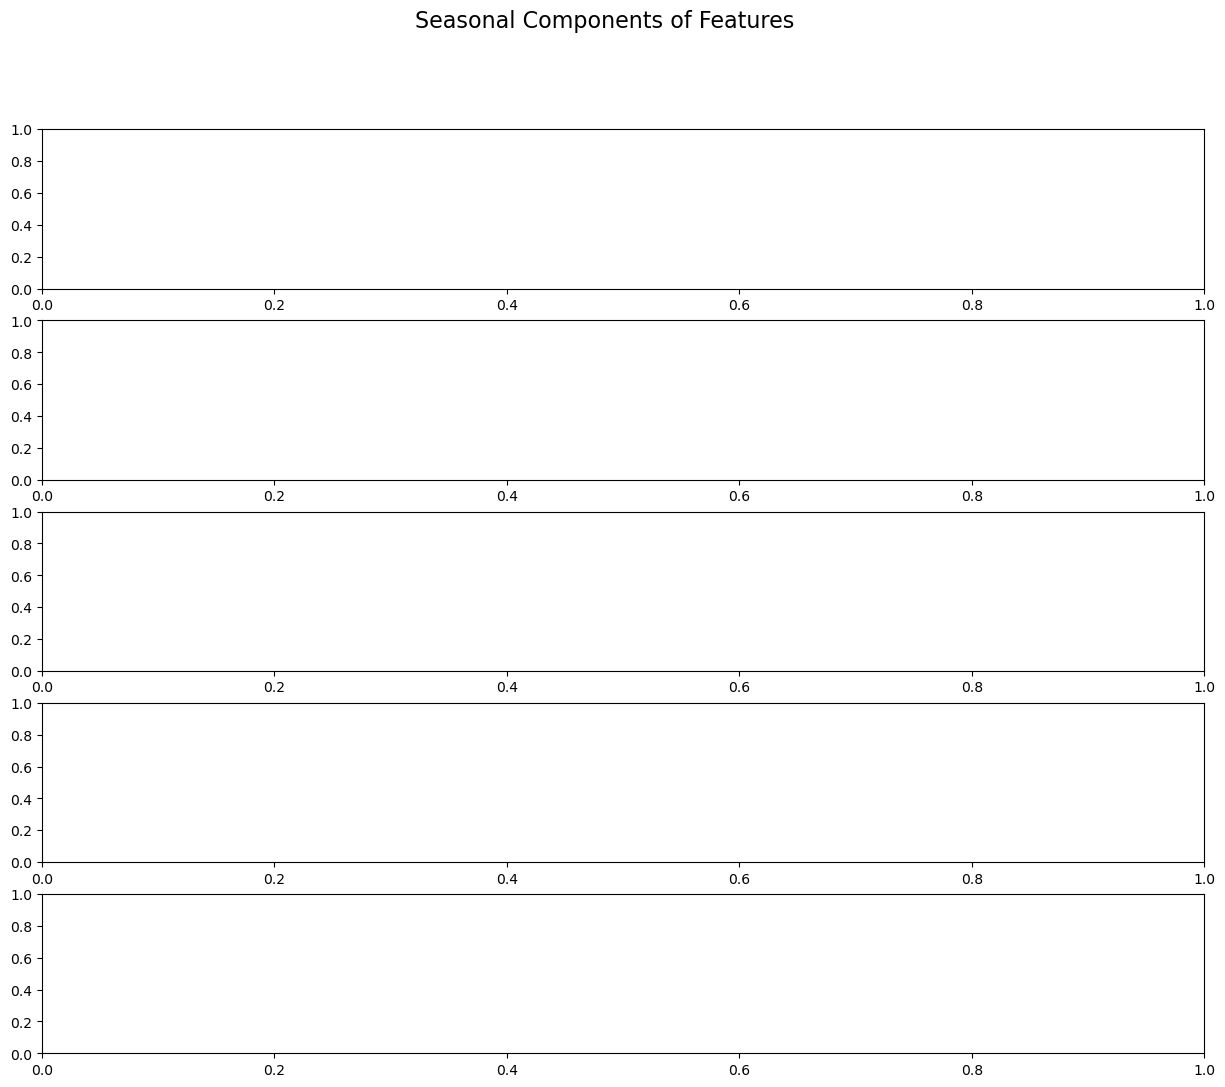

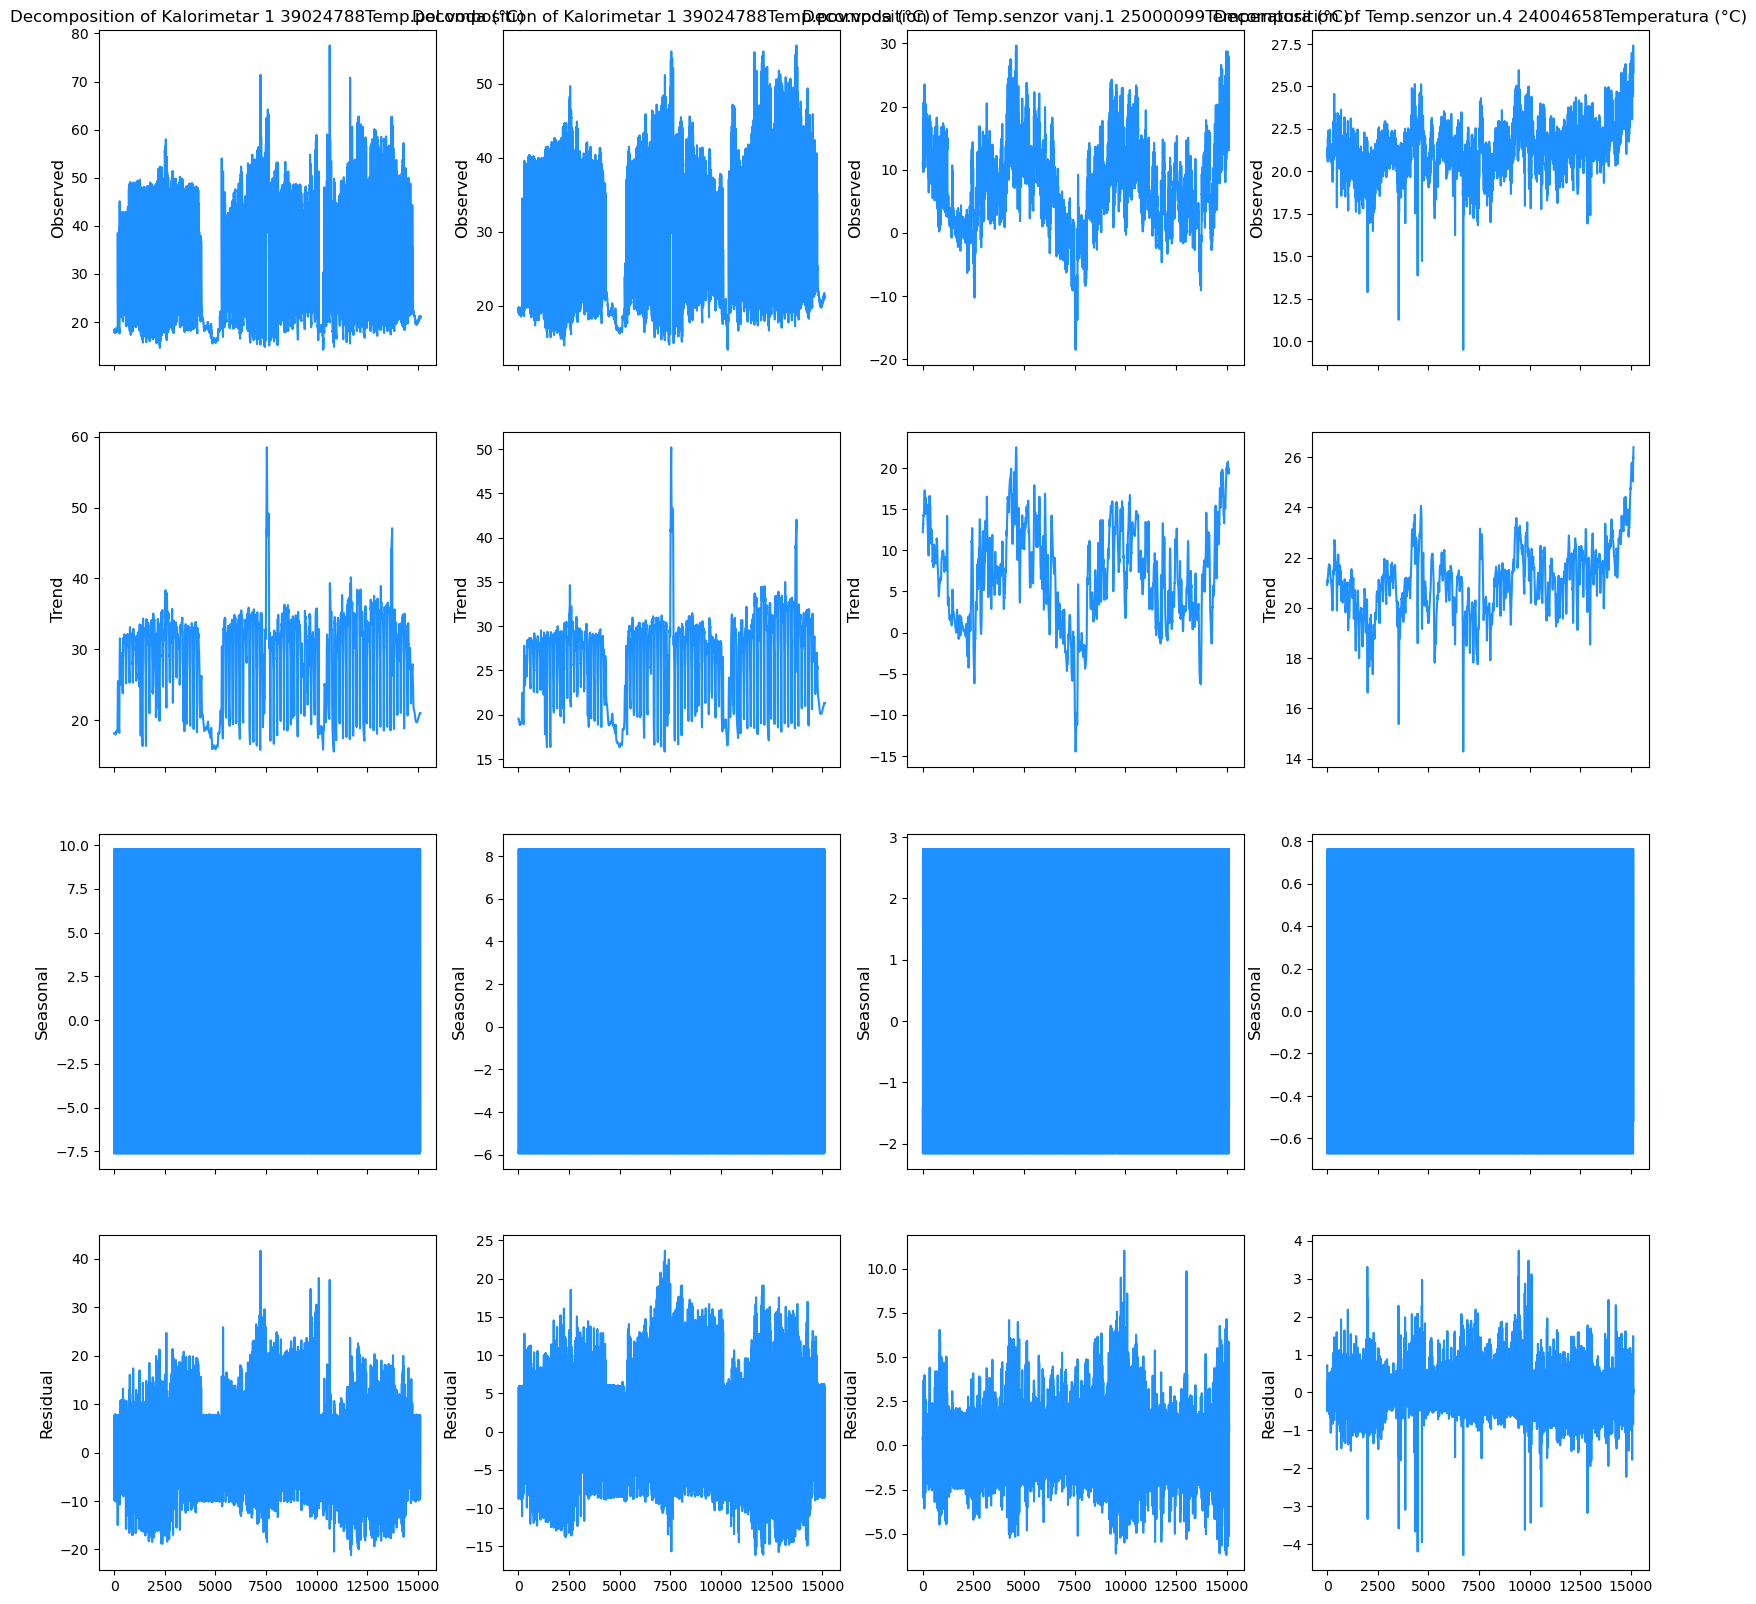

In [222]:
fig, ax = plt.subplots(ncols=4, nrows=4, sharex=True, figsize=(20,20))

for i, column in enumerate(series):
    
    res = seasonal_decompose(filex[column], freq=24, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=12)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=12)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=12)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=12)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=12)

plt.show()

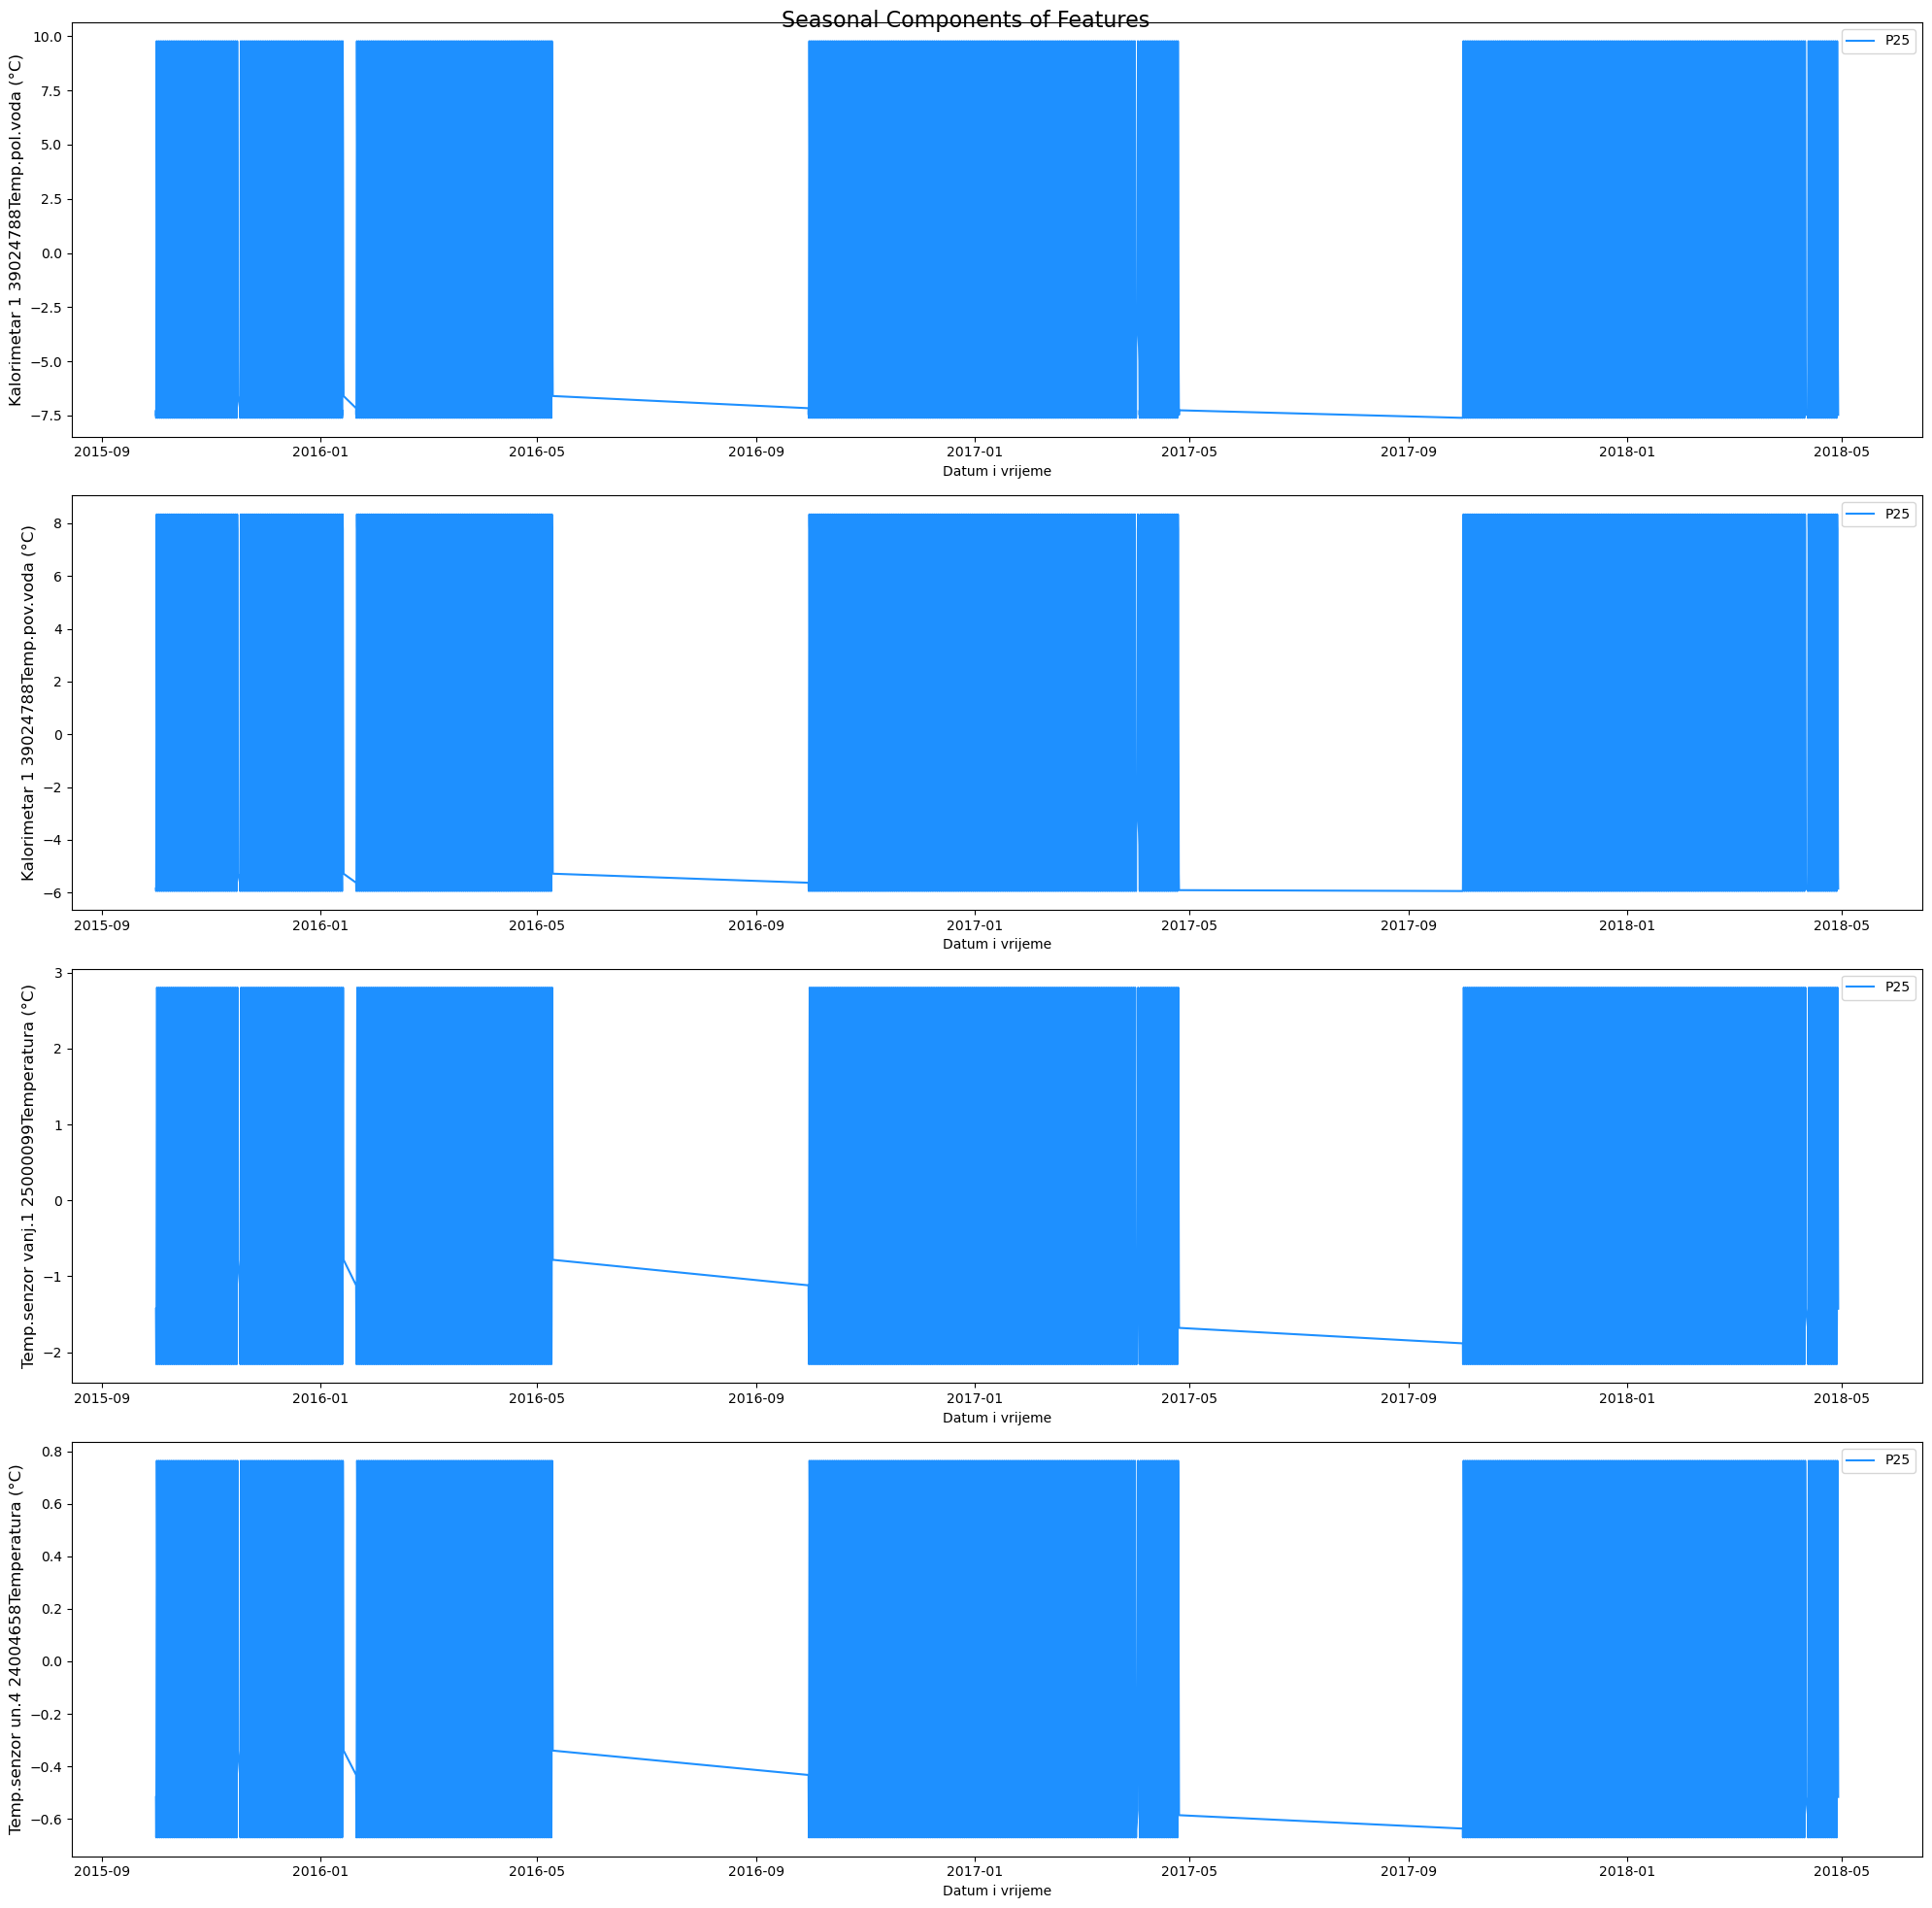

In [225]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(series):
    sns.lineplot(x=filex['Datum i vrijeme'], y=filex[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=12)
    
plt.tight_layout()
plt.show()

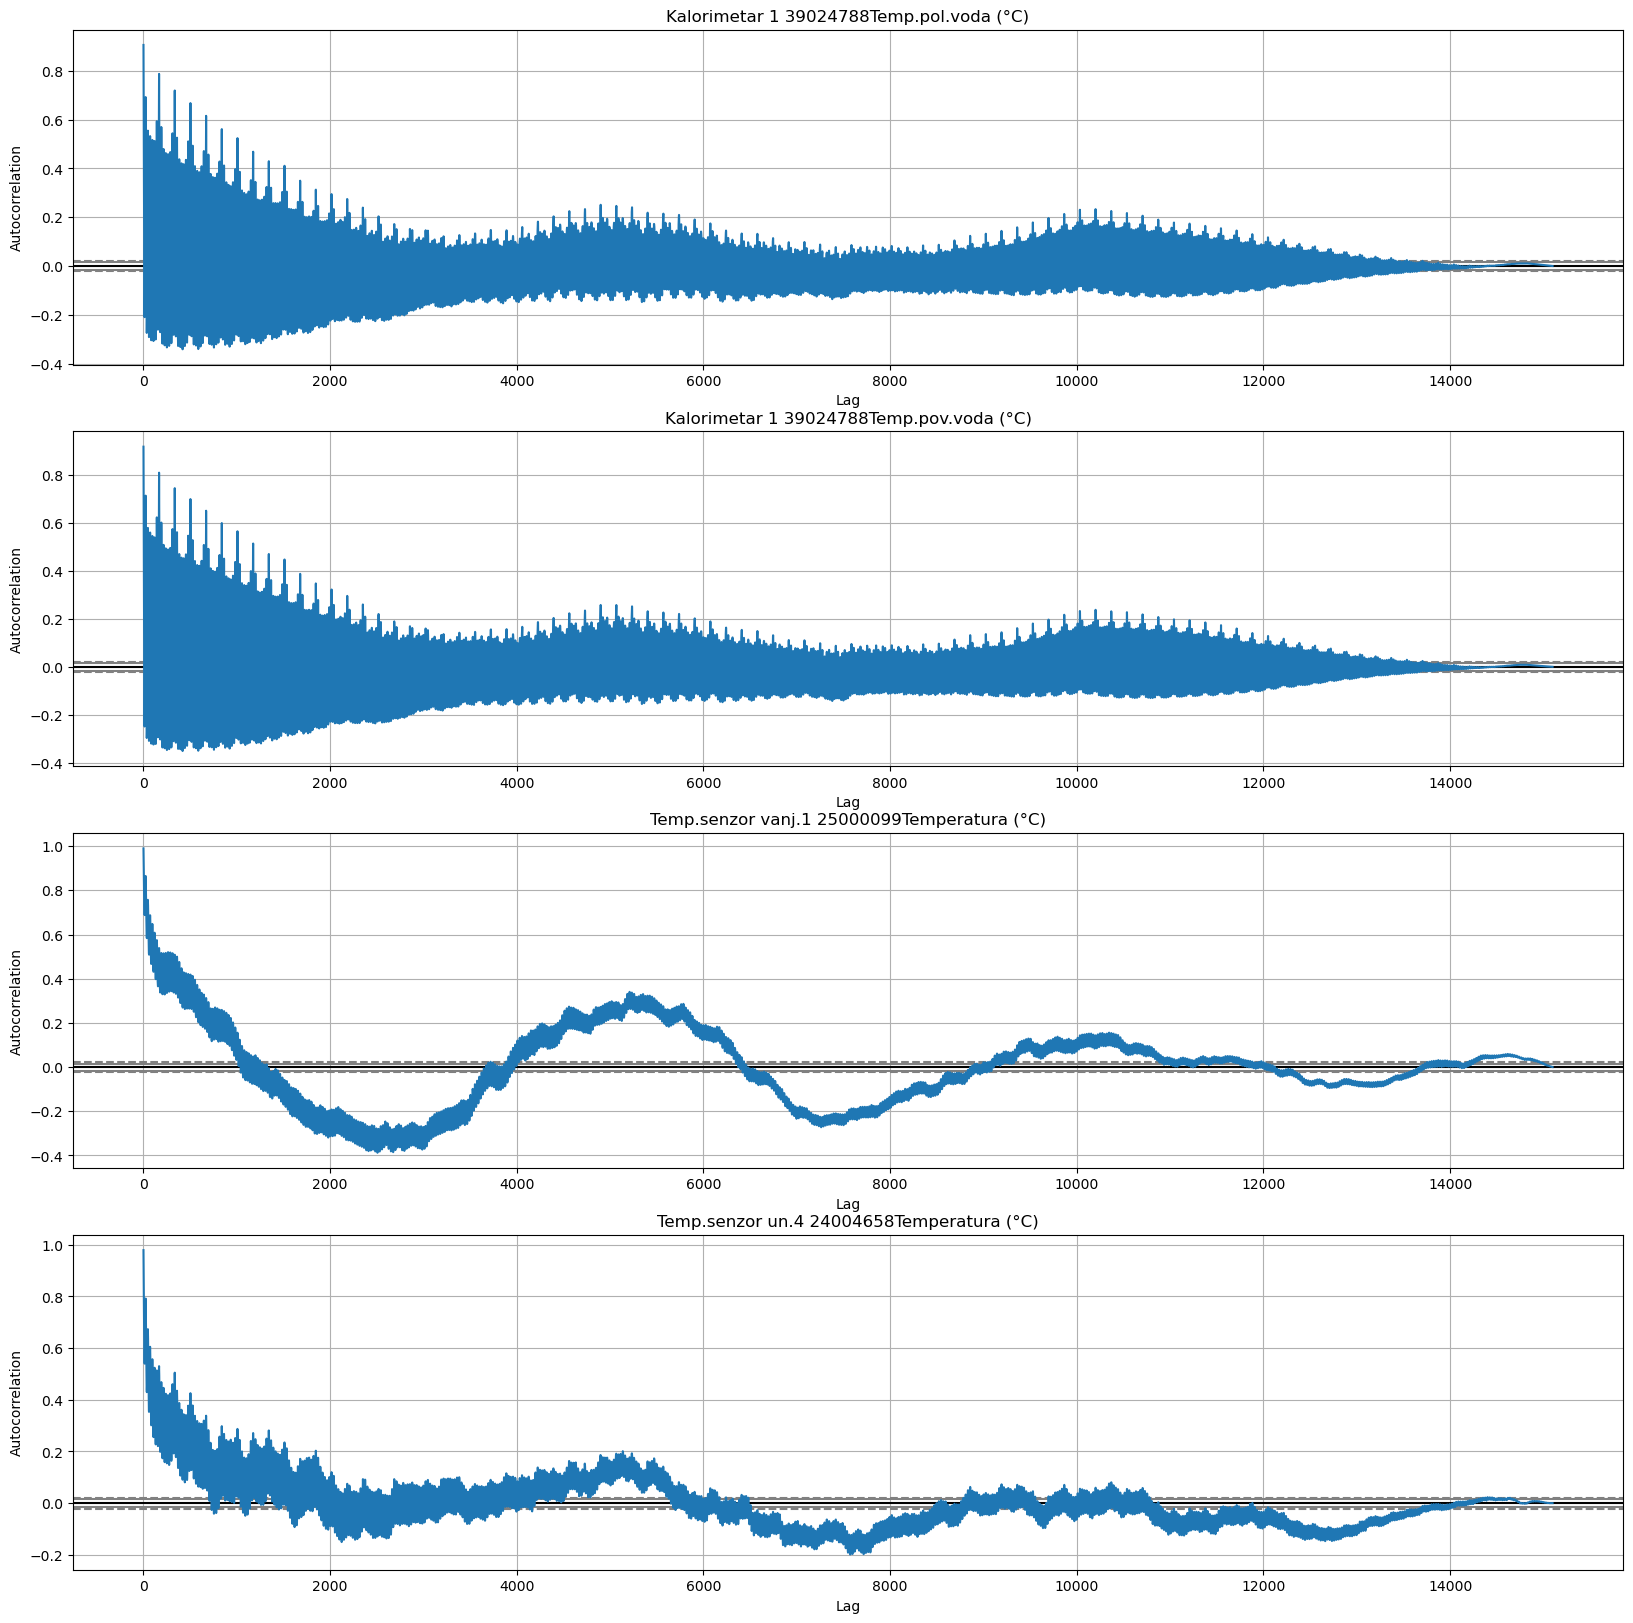

In [226]:
from pandas.plotting import autocorrelation_plot
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 20))
for i,column in enumerate(series):
    
    autocorrelation_plot(filex[column],ax=ax[i])
    ax[i].set_title(column)
plt.show()

In [229]:
from statsmodels.tsa.stattools import adfuller
for column in series:
    result = adfuller(filex[column].values)
    print(column,":", result)

Kalorimetar 1 39024788Temp.pol.voda (°C) : (-10.742678754327292, 2.7921065242574097e-19, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 85013.68974330096)
Kalorimetar 1 39024788Temp.pov.voda (°C) : (-10.697404983692307, 3.5951844824037815e-19, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 73917.2652511039)
Temp.senzor vanj.1 25000099Temperatura (°C) : (-5.169563632393096, 1.0141182826405006e-05, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 28767.71740581919)
Temp.senzor un.4 24004658Temperatura (°C) : (-5.683087535818087, 8.398558679486859e-07, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 1725.1109760998588)


In [228]:
    #from statsmodels.graphics.tsaplots import plot_acf
    #from statsmodels.graphics.tsaplots import plot_pacf

   # f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))
   # for i,column in enumerate(series):
        #plot_acf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[0])
        #plot_pacf(filex["Kalorimetar 1 39024788Temp.pol.voda (°C)"], lags=24, ax=ax[1])

   # plt.show()

In [81]:
X=file.loc[:,["Datum i vrijeme",#'Kalorimetar 1 39024788Temp.pol.voda (°C)',
       #'Kalorimetar 1 39024788Temp.pov.voda (°C)', 
        'Temp.senzor vanj.1 25000099Temperatura (°C)',
       #'Temp.senzor vanj.1 25000099Vlažnost (%)', 
        'Grijanje_K1','Broj sati grijanja_K1','Negrijano',
       'Sat', 'Dan u sedmici',
       'Mjesec', 'Godina', 'Kvartal', 'Dan u godini', 'Dan u mjesecu',
       #'Sedmica',
        "T prost (t-1)","T vanj(t-1)","T pol (t-1)","T pov (t-1)"]]

In [82]:
X.isna().sum()

Datum i vrijeme                                0
Temp.senzor vanj.1 25000099Temperatura (°C)    2
Grijanje_K1                                    0
Broj sati grijanja_K1                          0
Negrijano                                      0
Sat                                            0
Dan u sedmici                                  0
Mjesec                                         0
Godina                                         0
Kvartal                                        0
Dan u godini                                   0
Dan u mjesecu                                  0
T prost (t-1)                                  0
T vanj(t-1)                                    0
T pol (t-1)                                    0
T pov (t-1)                                    0
dtype: int64

In [83]:
file.to_excel("Merged files_1.xlsx", index=False)#manually modified and saved as Merged files_2)

In [84]:
X["Temp.senzor vanj.1 25000099Temperatura (°C)"]=X["Temp.senzor vanj.1 25000099Temperatura (°C)"].interpolate()

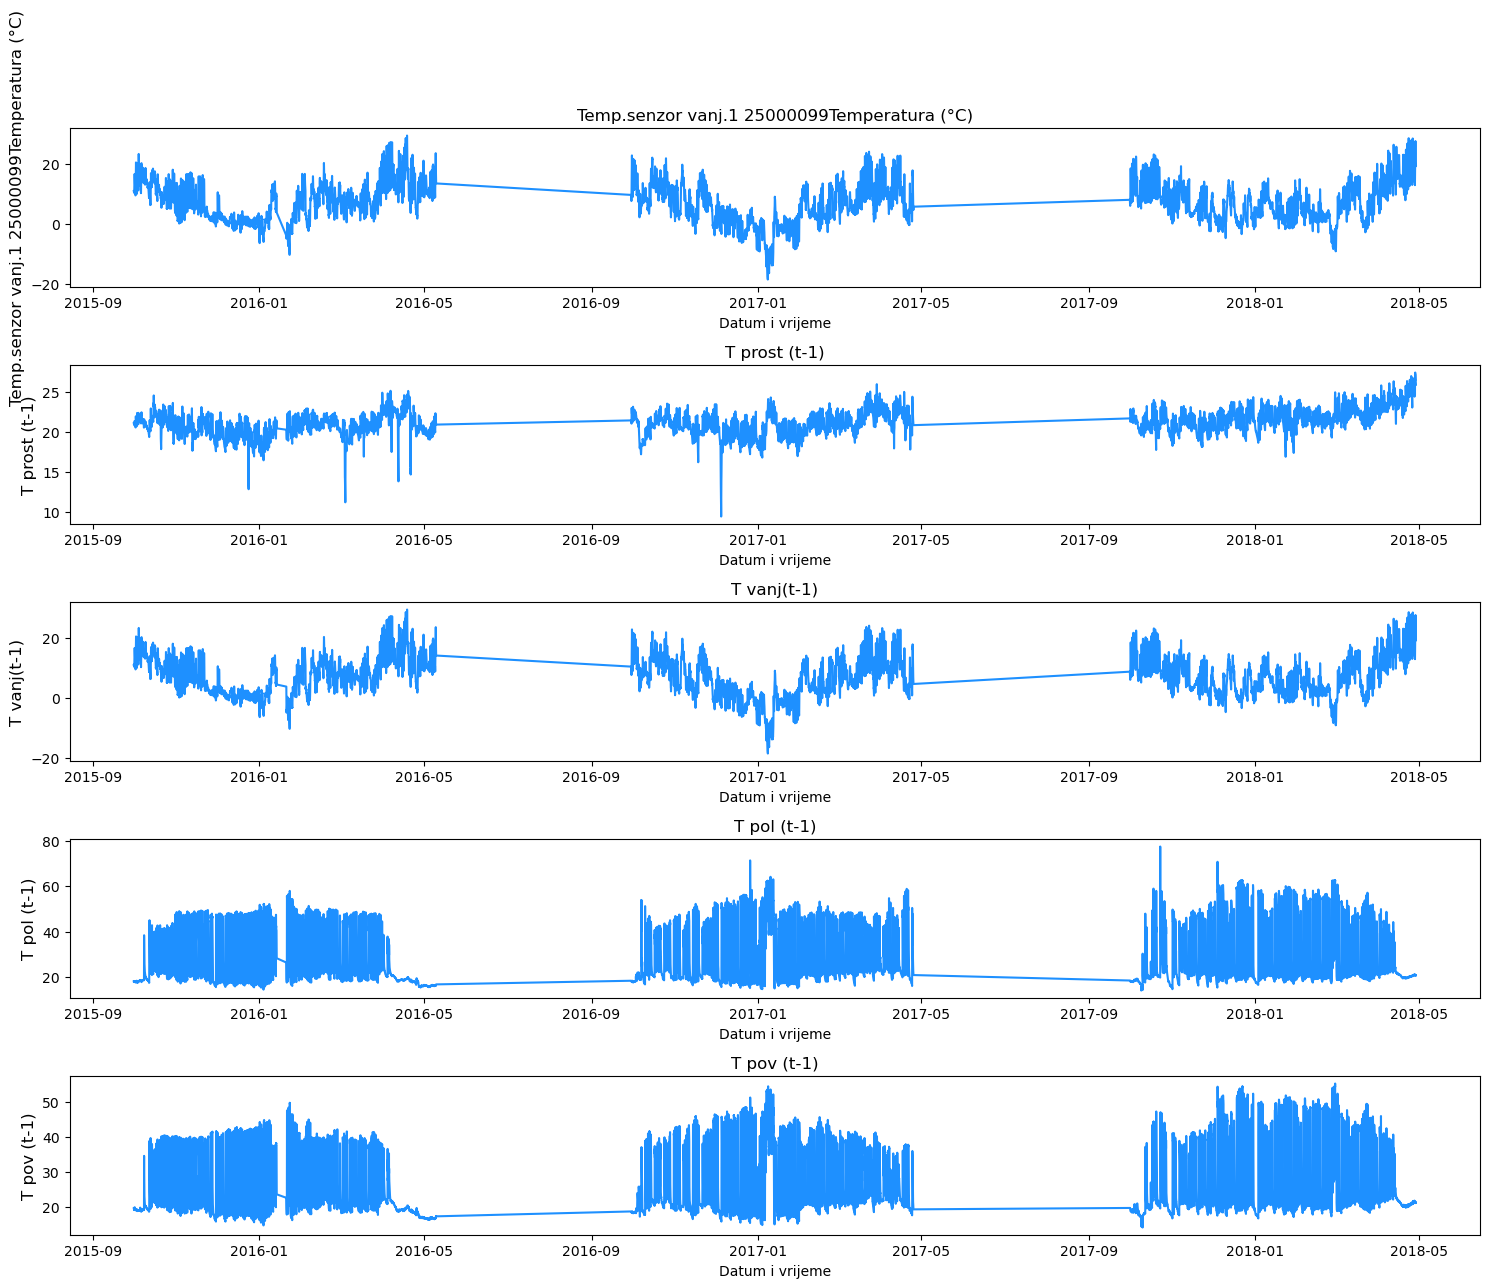

In [88]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))

sns.lineplot(x=X['Datum i vrijeme'], y=X['Temp.senzor vanj.1 25000099Temperatura (°C)'], ax=ax[0], color='dodgerblue')
ax[0].set_title('Temp.senzor vanj.1 25000099Temperatura (°C)', fontsize=12)
ax[0].set_ylabel(ylabel="Temp.senzor vanj.1 25000099Temperatura (°C)", fontsize=12)

sns.lineplot(x=X['Datum i vrijeme'], y=X["T prost (t-1)"], ax=ax[1], color='dodgerblue')
ax[1].set_title("T prost (t-1)", fontsize=12)
ax[1].set_ylabel(ylabel="T prost (t-1)", fontsize=12)

sns.lineplot(x=X['Datum i vrijeme'], y=X["T vanj(t-1)"], ax=ax[2], color='dodgerblue')
ax[2].set_title("T vanj(t-1)", fontsize=12)
ax[2].set_ylabel(ylabel="T vanj(t-1)", fontsize=12)

sns.lineplot(x=X['Datum i vrijeme'], y=X["T pol (t-1)"], ax=ax[3], color='dodgerblue')
ax[3].set_title("T pol (t-1)", fontsize=12)
ax[3].set_ylabel(ylabel="T pol (t-1)", fontsize=12)


sns.lineplot(x=X['Datum i vrijeme'], y=X["T pov (t-1)"], ax=ax[4], color='dodgerblue')
ax[4].set_title("T pov (t-1)", fontsize=12)
ax[4].set_ylabel(ylabel="T pov (t-1)", fontsize=12)

plt.tight_layout()
plt.show()

In [93]:
columns=['Temp.senzor vanj.1 25000099Temperatura (°C)',"T prost (t-1)","T vanj(t-1)","T pol (t-1)","T pov (t-1)"]
from statsmodels.tsa.stattools import adfuller
for column in columns:
    result = adfuller(X[column].values)
    print(column,":", result)

Temp.senzor vanj.1 25000099Temperatura (°C) : (-5.164506365007613, 1.0383948788000779e-05, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 28616.60408374863)
T prost (t-1) : (-5.680417253215092, 8.511726716048212e-07, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 1750.0560797635044)
T vanj(t-1) : (-5.19006919789755, 9.211941253521335e-06, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 28655.695673455597)
T pol (t-1) : (-10.715911198611154, 3.241980501617484e-19, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 84943.05304062576)
T pov (t-1) : (-10.6896026133267, 3.755515255274033e-19, 43, 15053, {'1%': -3.4307844924916697, '5%': -2.8617320269348, '10%': -2.566872211293916}, 73884.66985125252)


In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in columns:
    decomp = seasonal_decompose(X[column], period=5000, model='additive', extrapolate_trend='freq')
    X[f"{column}_trend"] = decomp.trend
    X[f"{column}_seasonal"] = decomp.seasonal

<ipython-input-114-8782c0aeb371>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')
<ipython-input-114-8782c0aeb371>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')
<ipython-input-114-8782c0aeb371>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')
<ipython-input-114-8782c0aeb371>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')
<ipython-input-114-8782c0aeb371>:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')


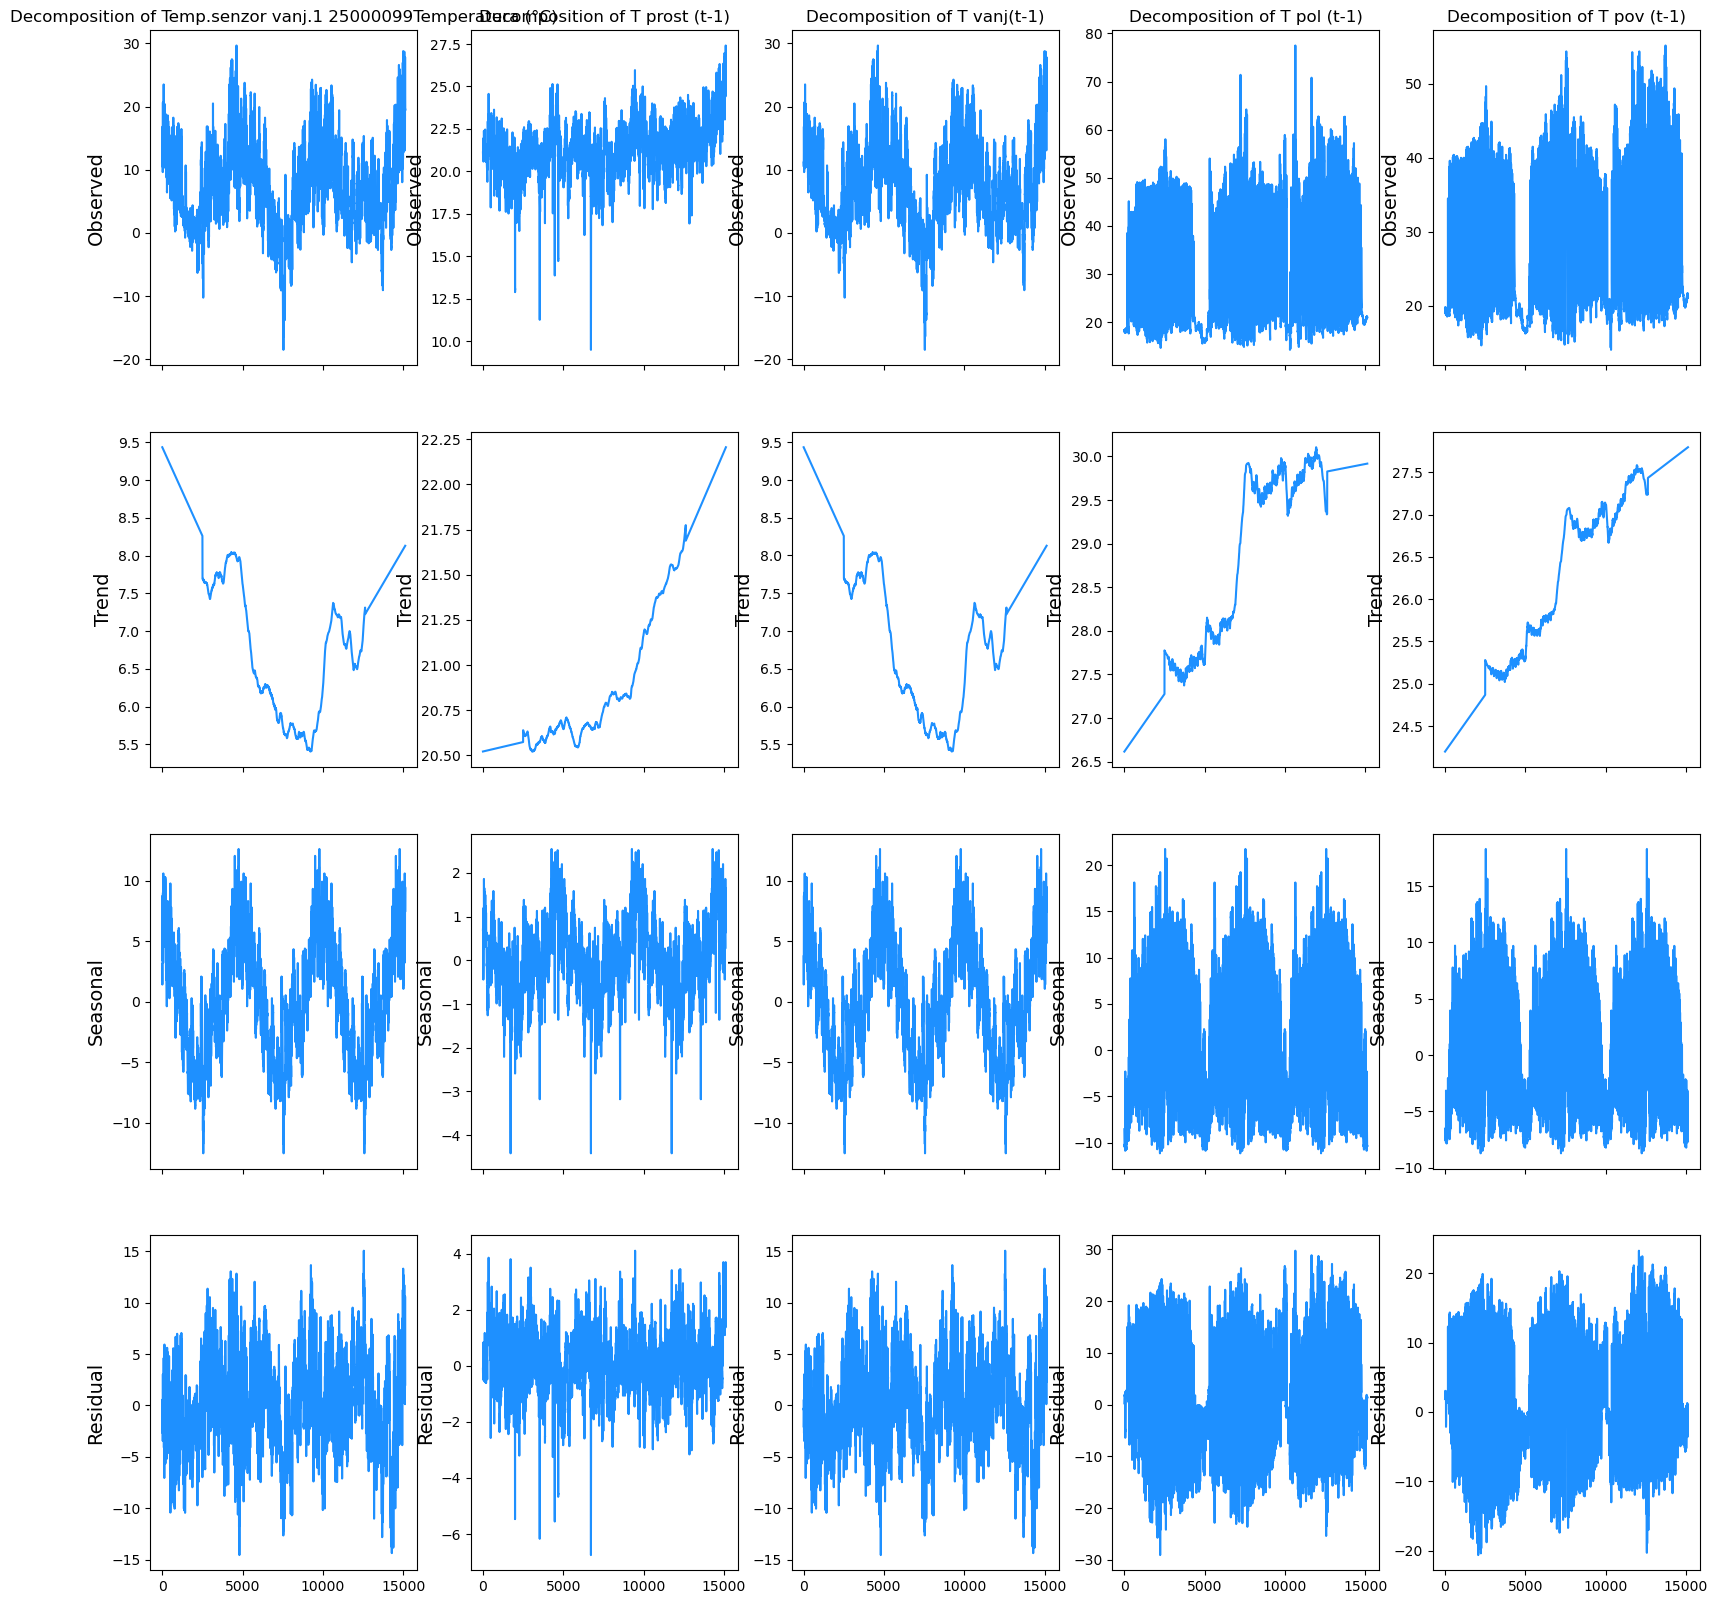

In [114]:
fig, ax = plt.subplots(ncols=5, nrows=4, sharex=True, figsize=(20,20))

for i, column in enumerate(columns):
    
    res = seasonal_decompose(X[column], freq=5000, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=12)
    res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
    ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
    res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.show()

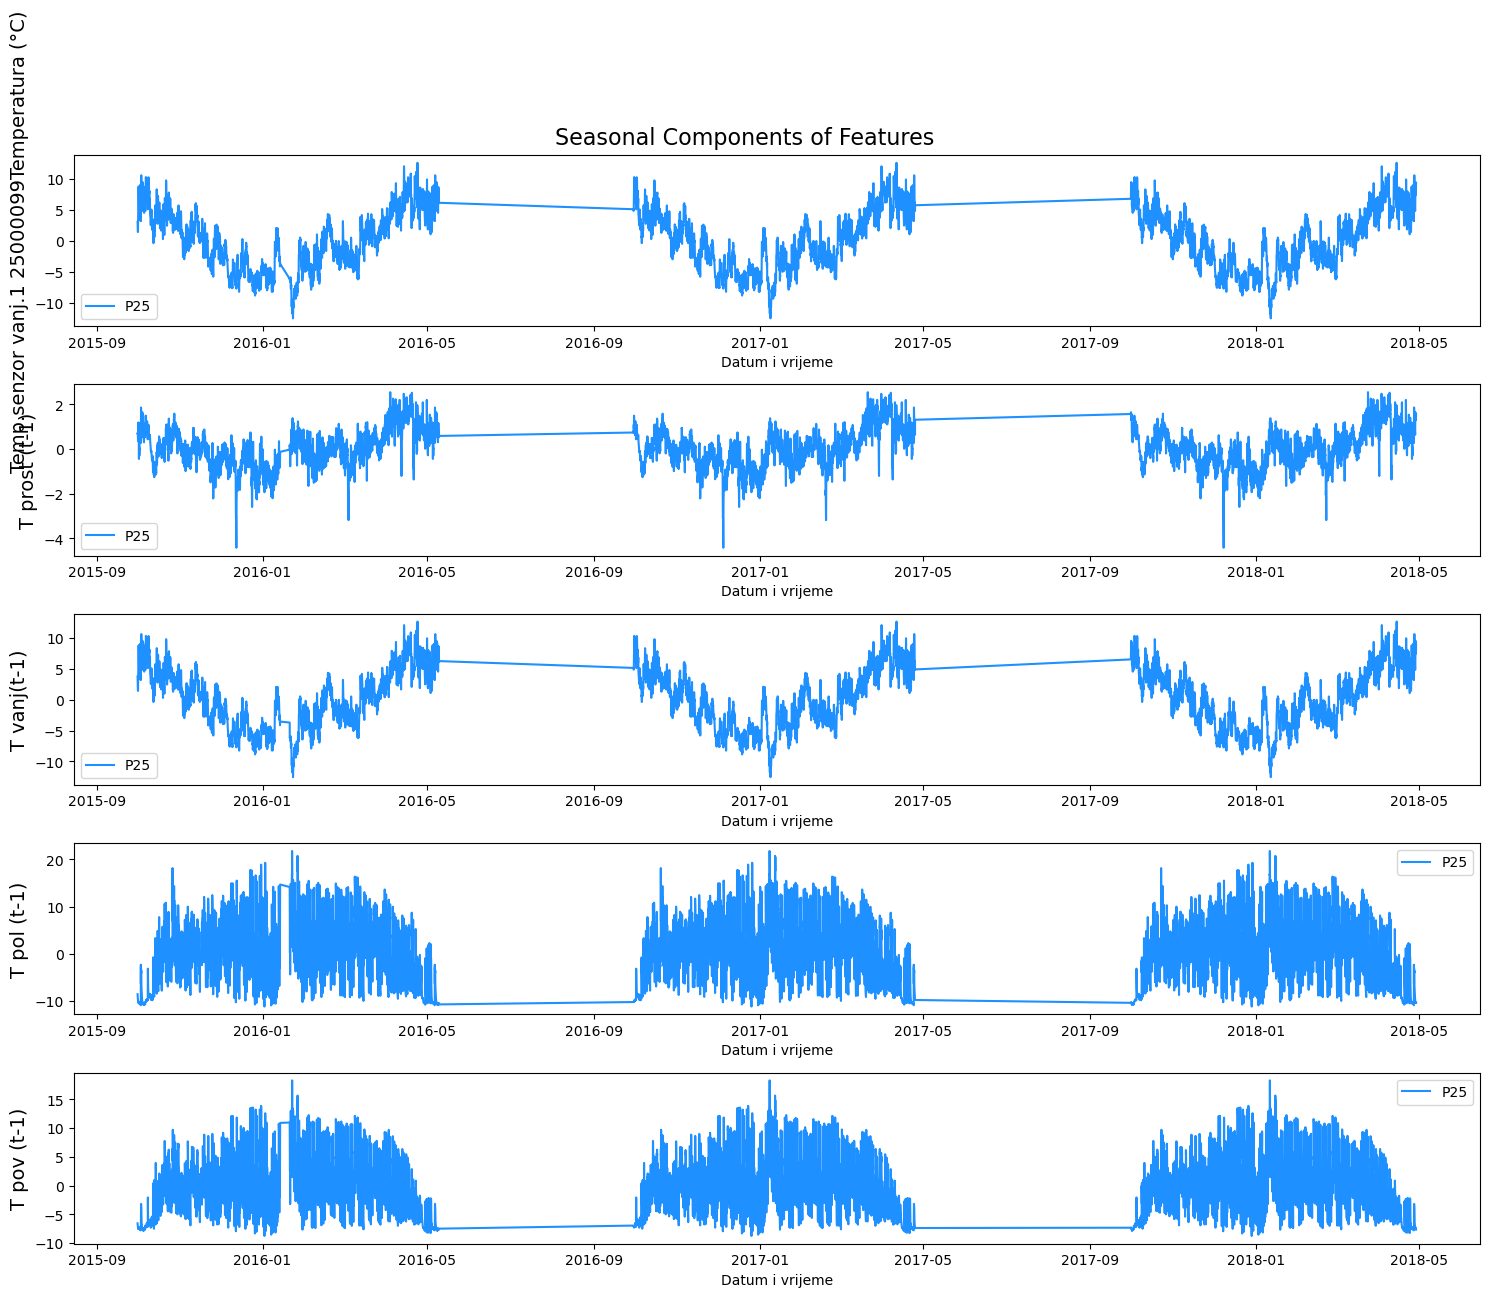

In [111]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 12))
f.suptitle('Seasonal Components of Features', fontsize=16)

for i, column in enumerate(columns):
    sns.lineplot(x=X['Datum i vrijeme'], y=X[column + '_seasonal'], ax=ax[i], color='dodgerblue', label='P25')
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    
plt.tight_layout()
plt.show()

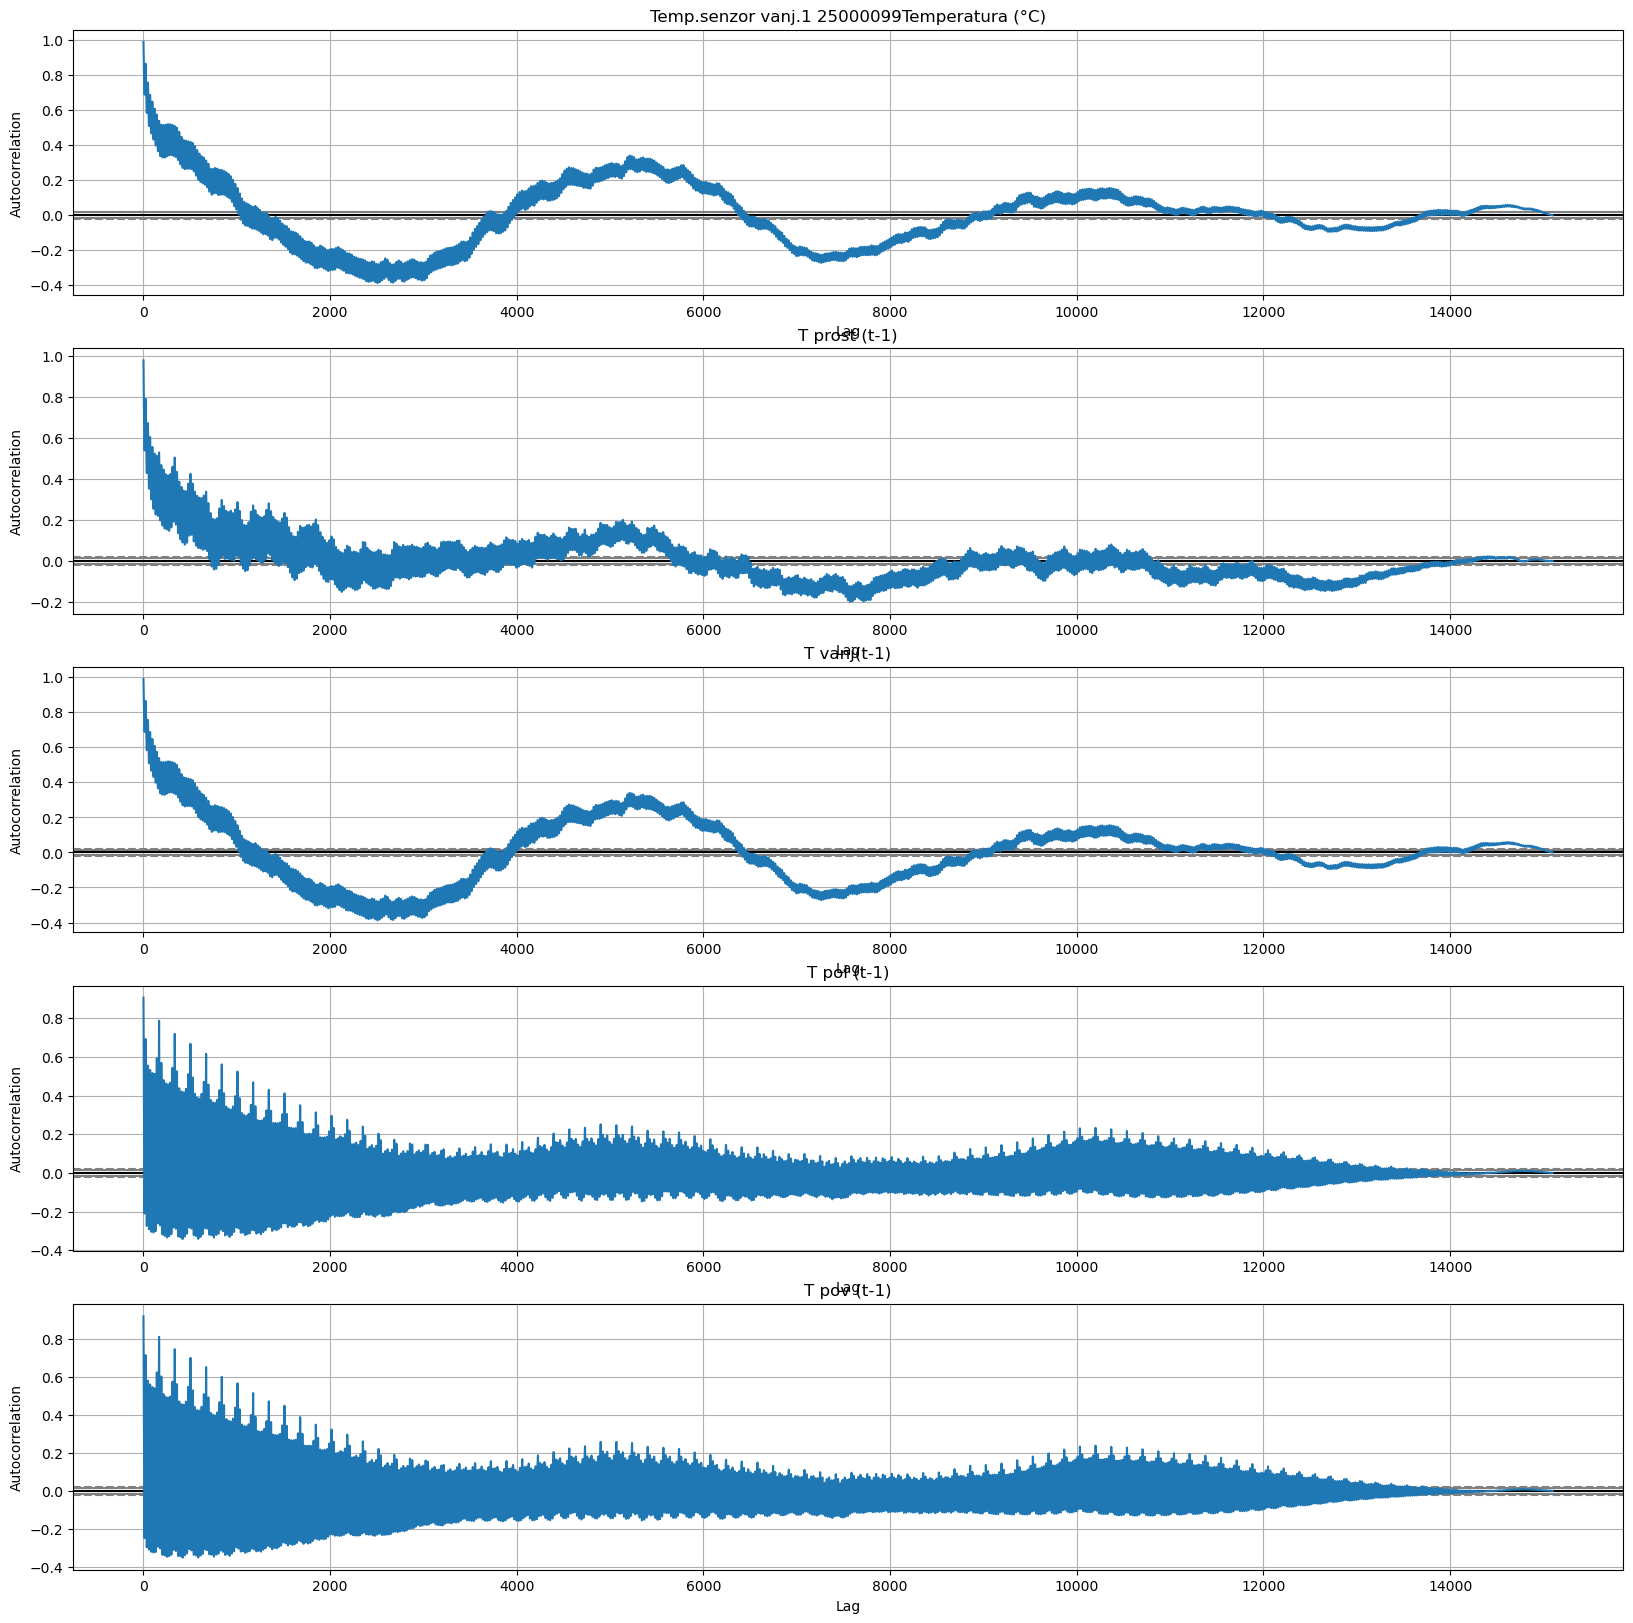

In [124]:
from pandas.plotting import autocorrelation_plot
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(20, 20))
for i,column in enumerate(columns):
    
    autocorrelation_plot(X[column],ax=ax[i])
    ax[i].set_title(column)
plt.show()